In [4]:
from scipy import integrate
import numpy as np
k = {
    'k1_xcribe_luxr': 9.0,
    'k2_xcribe_luxr': 20.0,
    'k_dec_mrna_luxr': 0.04,
    'k1_xlate_luxr': 9.0,
    'k2_xlate_luxr': 20.0,
    'k_dec_luxr': 0.075,
    'k_ext_diff_AHL': 0.1,
    'k_int_diff_AHL': 0.1,
    'k_dec_AHL': 0.075,
    'k_dim_luxr': 1.0,
    'k_sngl_luxr2': 0.1, #The one missing parameter value
    'k_dec_luxr2': 0.01875,
    'k_assoc_luxr2': 1.0,
    'k_dissoc_luxr2': 1.0,
    'k_decay_luxr2': 0.01875,
    'k1_xcribe_gfp': 9.0,
    'k1_xcribe_leak_gfp': 4.05e-06,
    'k2_xcribe_gfp': 20.0,
    'k_dec_mrna_gfp': 0.04,
    'k1_xlate_gfp': 900.0,
    'k2_xlate_gfp': 20.0,
    'k_dec_gfp': 0.0667,
    'k1_xcribe_CI': 9.0,
    'k1_xcribe_leak_CI': 4.05e-06,
    'k2_xcribe_CI': 20.0,
    'k_dec_mrna_CI': 0.04,
    'k1_xlate_CI': 13.5,
    'k2_xlate_CI': 20.0,
    'k_dec_CI': 0.1,
    'k_dim_CI': 0.5,
    'k_sngl_CI2': 0.0063,
    'k_dec_CI2': 0.05,
    'k_assoc_CI2': 5.0,
    'k_dissoc_CI2': 0.005,
    'k_decay_CI2': 0.05,
}

def pulse_response_ode(U, t, P_Ltet0_1, ahl_rate):
    dRNAp = -k['k1_xcribe_luxr'] * U[0] * P_Ltet0_1 + k['k2_xcribe_luxr'] * U[1] - k['k1_xcribe_gfp'] * U[0] * U[9] - k['k1_xcribe_leak_gfp'] * U[0] * U[8] + k['k2_xcribe_gfp'] * U[10] - k['k1_xcribe_CI'] * U[0] * U[15] + k['k2_xcribe_CI'] * U[16]
    dmRNA_Lux_RNAp = -k['k2_xcribe_luxr'] * U[1] + k['k1_xcribe_luxr'] * U[0] * P_Ltet0_1
    dmRNA_Lux_R = k['k2_xcribe_luxr'] * U[1] - k['k_dec_mrna_luxr'] * U[2]
    drRNA = -k['k1_xlate_luxr'] * U[3] * U[2] + k['k2_xlate_luxr'] * U[4] - k['k1_xlate_gfp'] * U[3] * U[11] + k['k2_xlate_gfp'] * U[12] - k['k1_xlate_CI'] * U[3] * U[17] + k['k2_xlate_CI'] * U[18]
    dLuxR_rRNA = k['k1_xlate_luxr'] * U[3] * U[2]  - k['k2_xlate_luxr'] * U[4]
    dLuxR = k['k2_xlate_luxr'] * U[4] - k['k_dec_luxr'] * U[5] - k['k_dim_luxr'] * U[6] ** 2 * U[5] ** 2 + 2 * k['k_sngl_luxr2'] * U[7]
    dAHL = k['k_ext_diff_AHL'] * U[23] - k['k_int_diff_AHL'] * U[6] - k['k_dec_AHL'] * U[6] - k['k_dim_luxr'] * U[6] ** 2 * U[5] ** 2 + 2 * k['k_sngl_luxr2'] * U[7]
    dLuxR_AHL_2 = - k['k_sngl_luxr2'] * U[7] + k['k_dim_luxr'] * U[6] ** 2 * U[5] ** 2 - k['k_dec_luxr2'] * U[7] - k['k_assoc_luxr2'] * U[7] * U[8] + k['k_dissoc_luxr2'] * U[9] - k['k_assoc_luxr2'] * U[7] * U[14] - k['k_dissoc_luxr2'] * U[15]
    dLux_PR_GFP = - k['k_assoc_luxr2'] * U[7] * U[8] + k['k_dissoc_luxr2'] * U[9] + k['k_decay_luxr2'] * U[9] - k['k_assoc_CI2'] * U[20] * U[8] - k['k_dissoc_CI2'] * U[21] + k['k_dec_CI2'] * U[21]
    dLux_PR_GFP_LuxR_AHL_2 = k['k_assoc_luxr2'] * U[7] * U[8] - k['k_dissoc_luxr2'] * U[9] - k['k_decay_luxr2'] * U[9] - k['k_assoc_CI2'] * U[20] * U[9] + k['k_dissoc_CI2'] * U[22] + k['k_dec_CI2'] * U[22]
    dmRNA_GFP_RNAp = k['k1_xcribe_gfp'] * U[0] * U[9] + k['k1_xcribe_leak_gfp'] * U[0] * U[8] - k['k2_xcribe_gfp'] * U[10]
    dmRNA_GFP = k['k2_xcribe_gfp'] * U[10] - k['k_dec_mrna_gfp'] * U[11] 
    dGFP_rRNA = k['k1_xlate_gfp'] * U[3] * U[11] - k['k2_xlate_gfp'] * U[12]
    dGFP = k['k2_xlate_gfp'] * U[12] - k['k_dec_gfp'] * U[13]
    dLux_PR_CI = - k['k_assoc_luxr2'] * U[7] * U[14] + k['k_dissoc_luxr2'] * U[15] + k['k_decay_luxr2'] * U[15]
    dLux_PR_CI_LuxR_AHL_2 = k['k_assoc_luxr2'] * U[7] * U[14] - k['k_dissoc_luxr2'] * U[15] - k['k_decay_luxr2'] * U[15]
    dmRNA_CI_RNAp = k['k1_xcribe_CI'] * U[0] * U[15] + k['k1_xcribe_CI'] * U[0] * U[14] - k['k2_xcribe_CI'] * U[16]
    dmRNA_CI = k['k2_xcribe_CI'] * U[16] - k['k_dec_mrna_CI'] * U[17]
    dCI_rRNA = k['k1_xlate_CI'] * U[3] * U[17] - k['k2_xlate_CI'] * U[18]
    dCI = k['k2_xlate_CI'] * U[18] - k['k_dec_CI'] * U[19] - 2 * k['k_dim_CI'] * U[19] ** 2 + 2 * k['k_sngl_CI2'] * U[20]
    dCI2 = k['k_dim_CI'] * U[19] ** 2 - k['k_sngl_CI2'] * U[20] - k['k_dec_CI2'] * U[20] - k['k_assoc_CI2'] * U[20] * U[8] + k['k_dissoc_CI2'] * U[21] - k['k_assoc_CI2'] * U[20] * U[9] + k['k_dissoc_CI2'] * U[22]
    dLux_Pr_GFP_OR1 = k['k_assoc_CI2'] * U[20] * U[8] - k['k_dissoc_CI2'] * U[21] - k['k_dec_CI2'] * U[21] - k['k_assoc_luxr2'] * U[21] * U[7] + k['k_dissoc_luxr2'] * U[22]
    dLux_Pr_GFP_LuxR_AH1_OR1 = k['k_assoc_CI2'] * U[20] * U[9] - k['k_dissoc_CI2'] * U[22] - k['k_dec_CI2'] * U[22] + k['k_assoc_luxr2'] * U[21] * U[7] - k['k_dissoc_luxr2'] * U[22] - k['k_dec_luxr2'] * U[22]
    dAHL_ext = (ahl_rate - ahl_rate / 50 * U[23])
    
    dudt = [dRNAp,
           dmRNA_Lux_RNAp,
           dmRNA_Lux_R,
           drRNA,
           dLuxR_rRNA,
           dLuxR,
           dAHL,
           dLuxR_AHL_2,
           dLux_PR_GFP,
           dLux_PR_GFP_LuxR_AHL_2,
           dmRNA_GFP_RNAp,
           dmRNA_GFP,
           dGFP_rRNA,
           dGFP,
           dLux_PR_CI,
           dLux_PR_CI_LuxR_AHL_2,
           dmRNA_CI_RNAp,
           dmRNA_CI,
           dCI_rRNA,
           dCI,
           dCI2,
           dLux_Pr_GFP_OR1,
           dLux_Pr_GFP_LuxR_AH1_OR1,
           dAHL_ext]
    
    return dudt
    
    
    
initial_U = np.zeros(24)
initial_U[0] = 100
initial_U[3] = 100
initial_U[8] = 1
initial_U[14] = 1
t = np.arange(0, 200, 0.01)
list_values = []
P_Ltet0_1 = 30
ahl_rates = [50, 10, 5, 1, 0.5, 0.335, 0.25]
for ahl_rate in ahl_rates:
    values = integrate.odeint(pulse_response_ode, initial_U, t, args=(P_Ltet0_1,ahl_rate), full_output=1)
    list_values.append(values[0])
    
    

Text(0.5, 1.0, 'Pulse Response from I1-FFL Dependent on rate of induction')

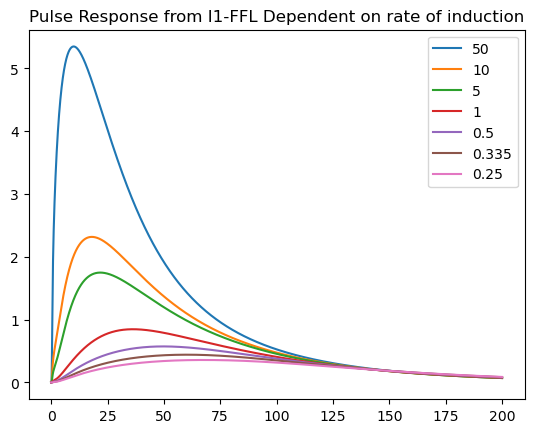

In [10]:
from matplotlib import pyplot as plt
n = len(t)
fig, ax = plt.subplots()
for values in list_values:
    ax.plot(t, values[:,13])
ax.legend(ahl_rates)
ax.set_title('Pulse Response from I1-FFL Dependent on rate of induction')

In [43]:
"""
A simplified version of an I1-FFL from Michael Elowitz's Biological Circuit Design Course:
"""
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline

def rhs(yz, t, F, r):
    """
    Right hand side of system of ODEs describing I1-FFL.
    """
    y, z = yz
    return np.array([F - y, (F / y - z) / r])

# Time points we want for the solution
t = np.linspace(0, 4, 1000)

# Initial condition
yz_0 = np.array([2.0, 1.0])

# Parameters
Fs = [10.0, 4.0, 1.0]
ys = []
zs = []
r = 0.1
for F in Fs:
# Integrate ODES
    yz = integrate.odeint(rhs, yz_0, t, args=(F, r))

    # Pluck out y and z
    y, z = yz.transpose()

    # Append the pre-fold change steady state
    y = np.insert(y, 0, 2.0)
    z = np.insert(z, 0, 1.0)
    ys.append(y)
    zs.append(z)
t = np.insert(t, 0, -1.0)

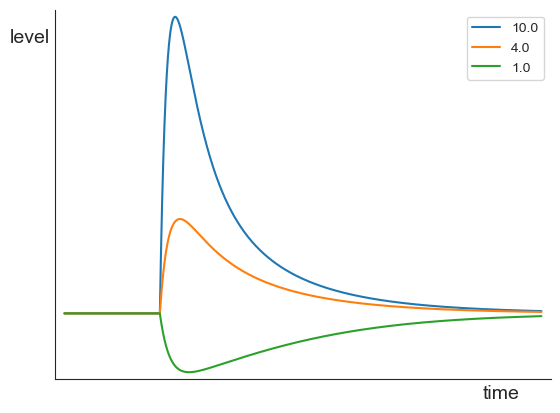

In [45]:
# Generate x
x = 2.0 + 2.0 * (t > 0.0).astype(dtype=float)

# Plot the results
fig, ax = plt.subplots(1, 1)
#ax.plot(t, x, '-')
#ax.plot(t, y, '-')
for z in zs:
    ax.plot(t, z, '-')
ax.set_xticks([])
ax.set_yticks([])
ax.margins(0.02)
ax.set_xlabel('time', x=.9, fontsize=14)
ax.set_ylabel('level', rotation=0, fontsize=14)
ax.legend(Fs)
ax.yaxis.set_label_coords(-0.05, 0.9) 
sns.despine(offset=0.1)